In [1]:
# Folder holding data, also used for output
data_loc = '/Users/pk/Data/'

#### Load packages

In [2]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler
import logging


plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.9 numpy==1.14.5 scipy==1.3.0 pandas==0.23.3 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


#### Load adata object

In [3]:
adata = sc.read(data_loc + 'adata_Luecken_compressed.h5ad')

#### Save boolean of all True to use the full dataset

In [4]:
hvg_bool = [True] * adata.shape[1]
# check it's numpy booleans
print("Confirm the output are booleans: ", type(hvg_bool[0]))
with open(data_loc + 'bool_Luecken_pp_all.pickle', 'wb') as handle:
    pickle.dump(hvg_bool, handle)

Confirm the output are booleans:  <class 'bool'>


#### Create and then save Louvain cluster labels

#### Normalize dispersions with Seurat method, use automatic selection of number of highly variable genes (HVG)

In [5]:
# hvg_metric_seurat is a recarray, it holds the values of the Seurat normalized gene variability
hvg_metric_seurat = sc.pp.highly_variable_genes(adata, flavor='seurat', inplace=False)
# create list of booleans
hvg_bool = []
for i in range(hvg_metric_seurat.shape[0]):
    hvg_bool.append(hvg_metric_seurat[i][0])
# count number of HVG
unique, counts = np.unique(hvg_bool, return_counts=True)
print(unique)
print(counts)
print("The automatically selected number of HVG is ", counts[1])

extracting highly variable genes
    finished (0:00:04)
[False  True]
[11983   835]
The automatically selected number of HVG is  835


#### Save boolean vector of the automatically selected HVG by the Seurat method

In [6]:
with open(data_loc + 'bool_Luecken_pp_Seurat_hvg_auto_835.pickle', 'wb') as handle:
    pickle.dump(hvg_bool, handle)

#### Plot Seurat HVG values, pick new gene selections by the 'elbows'

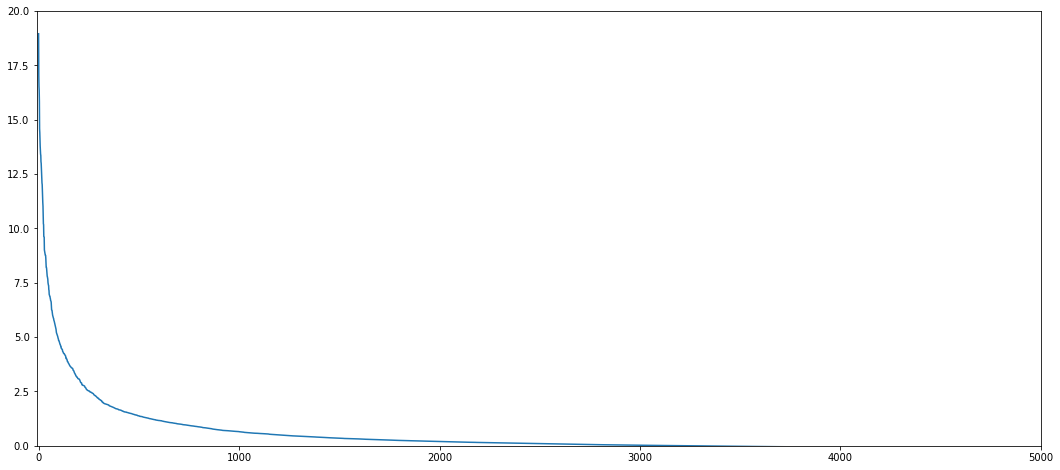

In [7]:
# list for normDisp values
normDisp_values = [] 
# copy normDisp values
for i in range(len(hvg_metric_seurat)):
    normDisp_values.append(hvg_metric_seurat[i][3])
# create index of normDisp values descending
normDisp_desc_index = np.argsort(normDisp_values)[::-1] 

# list for descending normDisp values
normDisp_desc_values = []
for i in range(hvg_metric_seurat.shape[0]):
    normDisp_desc_values.append(hvg_metric_seurat[normDisp_desc_index[i]][3])
plt.figure(figsize = (18,8))
plt.axis([-10, 5000, 0, 20])
plt.plot(normDisp_desc_values[:5000])

#### Plot segment of high normalised-dispersions, 'Seurat'

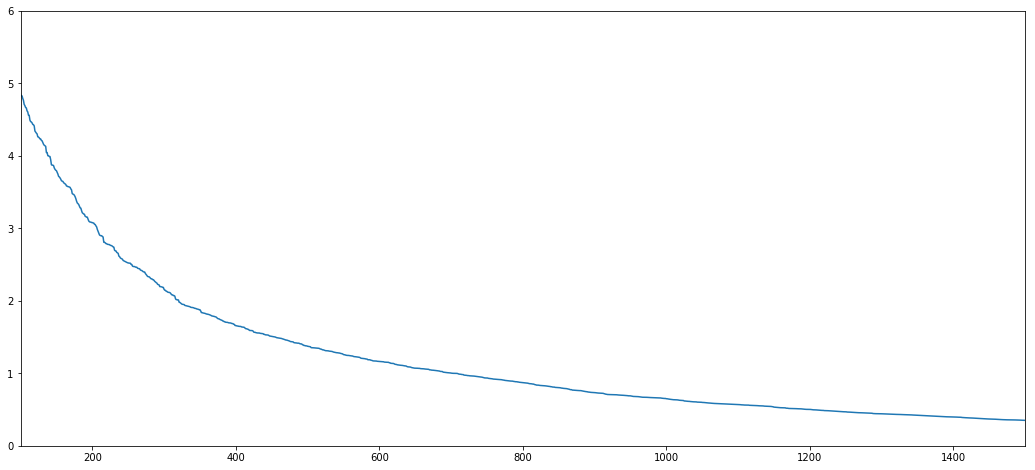

In [8]:
plt.figure(figsize = (18,8))
plt.axis([100, 1500, 0, 6])
plt.plot(normDisp_desc_values[:1550])

#### Save boolean for manual selection of Seurat HVG, 350

In [9]:
hvg_bool = np.zeros((len(hvg_metric_seurat)), dtype=bool)
for i in range(350):
    hvg_bool[normDisp_desc_index[i]] = True
hvg_bool = list(hvg_bool)

# save
with open(data_loc + 'bool_Luecken_pp_Seurat_hvg_manual_350.pickle', 'wb') as handle:
    pickle.dump(hvg_bool, handle)

#### Plot segment of lower normalised-dispersions, 'Seurat'

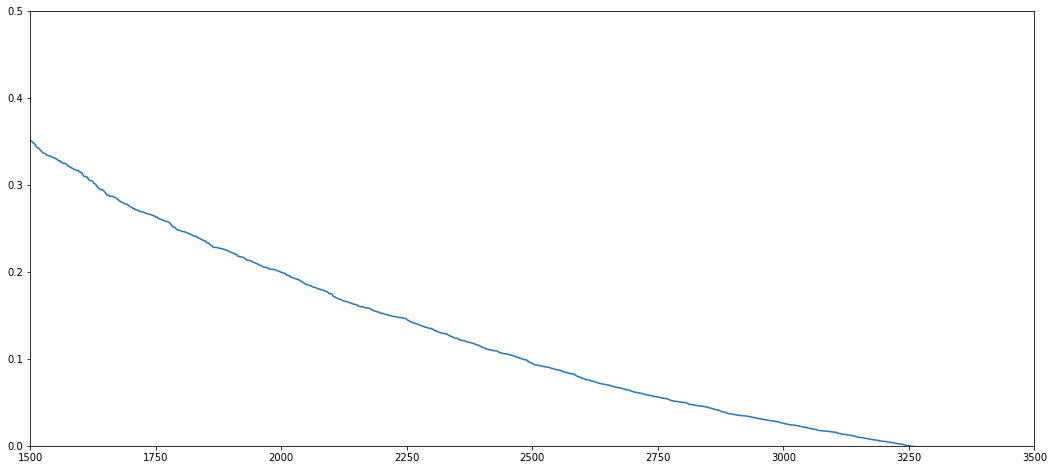

In [10]:
plt.figure(figsize = (18,8))
plt.axis([1500, 3500, 0, 0.5])
plt.plot(normDisp_desc_values[:3550])

#### Save boolean for manual selection of Seurat HVG, 3200

In [11]:
hvg_bool = np.zeros((len(hvg_metric_seurat)), dtype=bool)
for i in range(3200):
    hvg_bool[normDisp_desc_index[i]] = True
hvg_bool = list(hvg_bool)
# check it's numpy booleans
print(hvg_bool[:5])
print(type(hvg_bool[0]))
# save
with open(data_loc + 'bool_Luecken_pp_Seurat_hvg_manual_3200.pickle', 'wb') as handle:
    pickle.dump(hvg_bool, handle)

[False, False, False, False, False]
<class 'numpy.bool_'>


#### Normalize dispersions with Cell-ranger method, use automatic selection of number of highly variable genes (HVG)

In [12]:
adata = sc.read(data_loc + 'adata_Luecken_compressed.h5ad')
# hvg_metric_cell_ranger is a recarray
hvg_metric_cell_ranger = sc.pp.highly_variable_genes(adata, flavor='cell_ranger', inplace=False)
# create list of booleans
hvg_bool = []
for i in range(hvg_metric_cell_ranger.shape[0]):
    hvg_bool.append(hvg_metric_cell_ranger[i][0])
# count number of HVG
unique, counts = np.unique(hvg_bool, return_counts=True)
print(unique)
print(counts)
print("Max dispersion value: ", normDisp_desc_values[0])

extracting highly variable genes
    finished (0:00:01)
[False  True]
[6855 5963]
Max dispersion value:  18.950903


#### Save boolean vector of the automatically selected HVG by the Cell-ranger method, 5963

In [13]:
with open(data_loc + 'bool_Luecken_pp_Cellranger_hvg_auto_5963.pickle', 'wb') as handle:
    pickle.dump(hvg_bool, handle)

#### Plot Cell-ranger HVG values, pick new gene selections by the 'elbows'

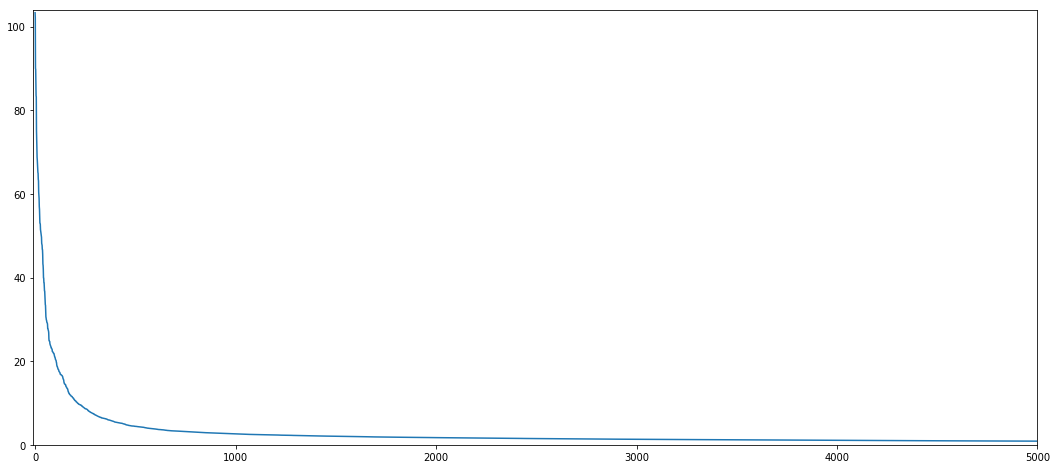

In [14]:
# list for normDisp values
normDisp_values = [] 
# copy normDisp values
for i in range(len(hvg_metric_cell_ranger)):
    normDisp_values.append(hvg_metric_cell_ranger[i][3])
# create index of normDisp values descending
normDisp_desc_index = np.argsort(normDisp_values)[::-1] 

# list for descending normDisp values
normDisp_desc_values = []
for i in range(hvg_metric_cell_ranger.shape[0]):
    normDisp_desc_values.append(hvg_metric_cell_ranger[normDisp_desc_index[i]][3])
plt.figure(figsize = (18,8))
plt.axis([-10, 5000, 0, 104])
plt.plot(normDisp_desc_values[:5000])

#### Plot segment of high normalised-dispersions, 'cell_ranger'

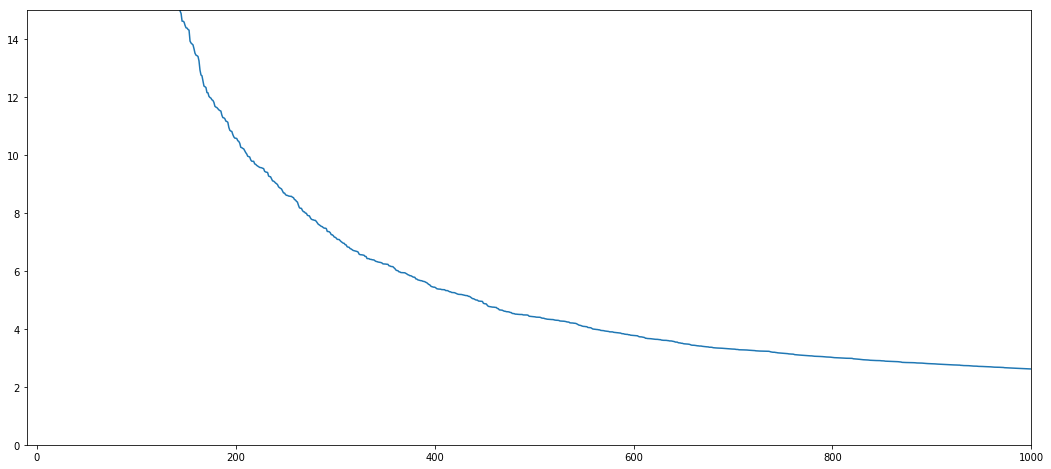

In [15]:
plt.figure(figsize = (18,8))
plt.axis([-10, 1000, 0, 15])
plt.plot(normDisp_desc_values[:7000])

#### Save boolean for manual selection of Cell-ranger HVG, 500

In [16]:
hvg_bool = np.zeros((len(hvg_metric_cell_ranger)), dtype=bool)
for i in range(500):
    hvg_bool[normDisp_desc_index[i]] = True
hvg_bool = list(hvg_bool)

# save
with open(data_loc + 'bool_Luecken_pp_Cellranger_hvg_manual_500.pickle', 'wb') as handle:
    pickle.dump(hvg_bool, handle)